Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.


In [3]:
import pandas as pd
cocacola= pd.read_excel("D:/DataScience/regression/forecasting-/CocaCola_Sales_Rawdata.xlsx")

In [4]:
cocacola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [39]:
cocacola.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [40]:
cocacola.shape

(42, 3)

In [41]:
cocacola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
Quarter    42 non-null object
Sales      42 non-null float64
quarter    42 non-null object
dtypes: float64(1), object(2)
memory usage: 1.1+ KB


In [42]:
cocacola.count()

Quarter    42
Sales      42
quarter    42
dtype: int64

In [5]:
import numpy as np
quarter=['Q1','Q2','Q3','Q4']
n = cocacola['Quarter'][0]
n[0:2]

'Q1'

In [7]:
cocacola['quarter'] = 0

In [8]:
for i in range(42):
    n = cocacola['Quarter'][i]
    cocacola['quarter'][i] = n[0:2]

C:\Users\agnis\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\agnis\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [10]:
dummy = pd.DataFrame(pd.get_dummies(cocacola['quarter']))

In [11]:
coca = pd.concat((cocacola,dummy),axis=1)
t = np.arange(1,43)
coca['t']= t
coca['t_square'] = coca['t']*coca['t']

In [31]:
coca.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


In [12]:
log_Sales = np.log(coca['Sales'])
coca['log_Sales'] = log_Sales

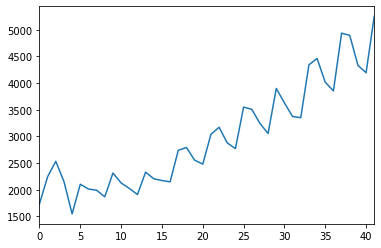

In [14]:
train = coca.head(38)
test = coca.tail(4)
coca.Sales.plot()

In [15]:
import statsmodels.formula.api as smf

In [16]:
#linear model
linear = smf.ols('Sales~t',data=train).fit()
predlin = pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmselin = np.sqrt((np.mean(np.array(test['Sales'])-np.array(predlin))**2))
rmselin

421.17878760022813

In [17]:
#quadratic model
quad = smf.ols('Sales~t+t_square',data=train).fit()
predquad = pd.Series(quad.predict(pd.DataFrame(test[['t','t_square']])))
rmsequad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(predquad))**2))
rmsequad

475.56183518315095

In [18]:
#exponential model
expo = smf.ols('log_Sales~t',data=train).fit()
predexp = pd.Series(expo.predict(pd.DataFrame(test['t'])))
predexp
rmseexpo = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo

466.24797310672346

In [19]:
data = {'Model':pd.Series(['rmseexpo','rmselin','rmsequad']),'Values':pd.Series([rmseexpo,rmselin,rmsequad])}
data

{'Model': 0    rmseexpo
 1     rmselin
 2    rmsequad
 dtype: object, 'Values': 0    466.247973
 1    421.178788
 2    475.561835
 dtype: float64}

In [20]:
Rmse = pd.DataFrame(data)
Rmse

,Model,Values
0,rmseexpo,466.247973
1,rmselin,421.178788
2,rmsequad,475.561835


In [32]:
coca_pred = pd.read_excel("D:/DataScience/regression/forecasting-/CocaCola_Sales_Rawdata.xlsx")

In [33]:
quarter=['Q1','Q2','Q3','Q4']
n = coca['Quarter'][0]
n[0:2]
coca['quarter'] = 0

In [34]:
for i in range(42):
    n = cocacola['Quarter'][i]
    cocacola['quarter'][i] = n[0:2]

C:\Users\agnis\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
dummy1 = pd.DataFrame(pd.get_dummies(coca['quarter']))

In [36]:
coca_pred = pd.concat((coca,dummy1),axis=1)
t = np.arange(1,43)
coca['t']= t
coca['t_square'] = coca['t']*coca['t']

In [37]:
coca_pred.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales,0
0,Q1_86,1734.827000,0,1,0,0,0,1,1,7.458663,1
1,Q2_86,2244.960999,0,0,1,0,0,2,4,7.716443,1
2,Q3_86,2533.804993,0,0,0,1,0,3,9,7.837477,1
3,Q4_86,2154.962997,0,0,0,0,1,4,16,7.675529,1
4,Q1_87,1547.818996,0,1,0,0,0,5,25,7.344602,1


In [38]:
final = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=coca).fit()
pred = pd.Series(final.predict(coca_pred))
actual_pred = np.exp(pred)
actual_pred

0     1539.516800
1     1958.133190
2     1941.716476
3     1792.297460
4     1695.770302
5     2156.874230
6     2138.791299
7     1974.206976
8     1867.882779
9     2375.786523
10    2355.868262
11    2174.579427
12    2057.463839
13    2616.917354
14    2594.977486
15    2395.288712
16    2266.286458
17    2882.521797
18    2858.355139
19    2638.398921
20    2496.303563
21    3175.083806
22    3148.464349
23    2906.183639
24    2749.666290
25    3497.339441
26    3468.018239
27    3201.147210
28    3028.744108
29    3852.302464
30    3820.005302
31    3526.048155
32    3336.146973
33    4243.292516
34    4207.717347
35    3883.924973
36    3674.749740
37    4673.966165
38    4634.780289
39    4278.124557
40    4047.719050
41    5148.351104
dtype: float64